[Reference](https://medium.com/@evertongomede/step-by-step-of-principal-component-analysis-d406f6e57ec4)

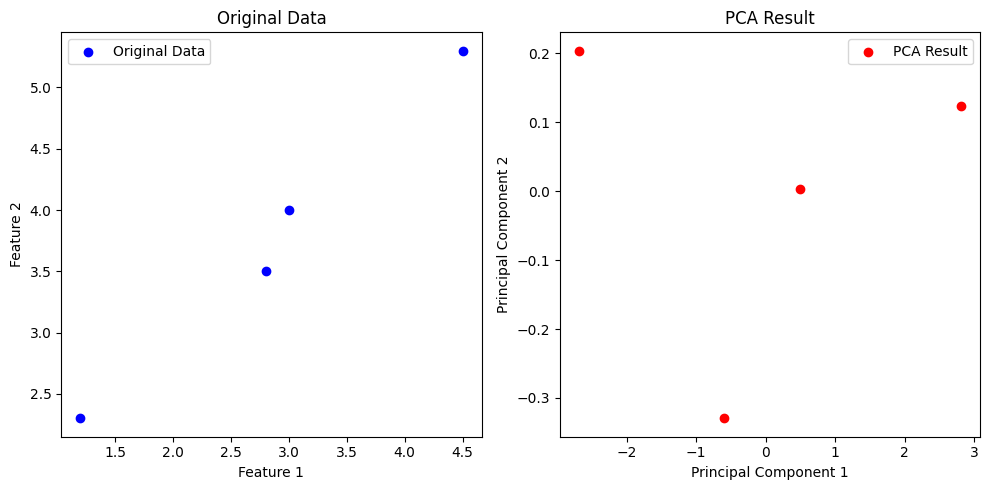

In [1]:
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Step 1: Data Collection and Standardization
# Example data (replace this with your own dataset)
data = np.array([[1.2, 2.3, 4.0, 3.8],
                 [2.8, 3.5, 6.5, 5.0],
                 [3.0, 4.0, 7.9, 6.2],
                 [4.5, 5.3, 9.0, 7.8]])

# Standardize the data
scaler = StandardScaler()
data_standardized = scaler.fit_transform(data)

# Step 2: Covariance Matrix Calculation
cov_matrix = np.cov(data_standardized, rowvar=False)

# Step 3: Eigenvalue and Eigenvector Computation
eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)

# Step 4: Sorting and Selecting Principal Components
# Sort eigenvalues and their corresponding eigenvectors in descending order
eigenvalue_eigenvector_pairs = [(eigenvalues[i], eigenvectors[:, i]) for i in range(len(eigenvalues))]
eigenvalue_eigenvector_pairs.sort(key=lambda x: x[0], reverse=True)

# Choose the number of principal components to keep (e.g., 2 components)
num_components = 2
selected_eigenpairs = eigenvalue_eigenvector_pairs[:num_components]

# Create the projection matrix from selected eigenvectors
projection_matrix = np.column_stack((selected_eigenpairs[0][1], selected_eigenpairs[1][1]))

# Step 5: Data Transformation
# Project the standardized data onto the new reduced-dimensional space
data_pca = data_standardized.dot(projection_matrix)

# Step 6: Plot the Original Data and PCA Results
plt.figure(figsize=(10, 5))

# Plot the original data
plt.subplot(1, 2, 1)
plt.scatter(data[:, 0], data[:, 1], c='b', label='Original Data')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Original Data')
plt.legend()

# Plot the PCA results
plt.subplot(1, 2, 2)
plt.scatter(data_pca[:, 0], data_pca[:, 1], c='r', label='PCA Result')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA Result')
plt.legend()

plt.tight_layout()
plt.show()